# Deskripsi Data

# **Connect**

In [ ]:
#pip install numpy==1.24.4 scikit-learn==1.3.2 scikit-learn-extra==0.3.0

In [2]:
# Import Packages
import os
import sqlite3
import pandas as pd
import numpy as np
import statistics
from scipy.stats import chi2
from matplotlib import patches
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
data = pd.read_csv('/content/gdrive/MyDrive/Portofolio/Tugas Akhir/dataset.csv')

# **Data Preprocessing**

## Mengubah Tipe Data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   username            569 non-null    object
 1   tanggal pemesanan   569 non-null    object
 2   tanggal pembayaran  569 non-null    object
 3   produk              569 non-null    object
 4   jumlah              569 non-null    int64 
 5   harga               569 non-null    int64 
 6   metode pembayaran   569 non-null    object
dtypes: int64(2), object(5)
memory usage: 31.2+ KB


In [7]:
# Ubah format tanggal menjadi datetime
data['tanggal pemesanan'] = pd.to_datetime(data['tanggal pemesanan'], format='%d/%m/%Y')
data['tanggal pembayaran'] = pd.to_datetime(data['tanggal pembayaran'], format='%d/%m/%Y')

In [8]:
# Mendapatkan tanggal paling awal dan paling akhir
tanggal_paling_awal = data['tanggal pembayaran'].min()
tanggal_paling_akhir = data['tanggal pembayaran'].max()

print("Tanggal paling awal:", tanggal_paling_awal)
print("Tanggal paling akhir:", tanggal_paling_akhir)

Tanggal paling awal: 2022-01-12 00:00:00
Tanggal paling akhir: 2024-02-02 00:00:00


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   username            569 non-null    object        
 1   tanggal pemesanan   569 non-null    datetime64[ns]
 2   tanggal pembayaran  569 non-null    datetime64[ns]
 3   produk              569 non-null    object        
 4   jumlah              569 non-null    int64         
 5   harga               569 non-null    int64         
 6   metode pembayaran   569 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 31.2+ KB


In [10]:
data.head()

,username,tanggal pemesanan,tanggal pembayaran,produk,jumlah,harga,metode pembayaran
0,Customer_1,2022-04-18,2022-04-18,Tender Care Gift Set,1,51000,ShopeePay
1,Customer_2,2022-04-22,2022-04-22,Tender Care Gift Set,1,51000,ShopeePay
2,Customer_3,2022-04-25,2022-04-25,Glow Essentials BodyLotion with Vitamin E,1,68000,ShopeePay
3,Customer_4,2022-04-25,2022-04-25,Tender Care Gift Set,1,51000,ShopeePay
4,Customer_5,2022-04-26,2022-04-26,Tender Care Gift Set,1,51000,ShopeePay


## Missing Value

In [11]:
jumlah_missing = pd.isnull(data).sum()
jumlah_missing

,0
username,0
tanggal pemesanan,0
tanggal pembayaran,0
produk,0
jumlah,0
harga,0
metode pembayaran,0


## Duplicate

In [12]:
duplicates = data[data.duplicated()]
duplicates

,username,tanggal pemesanan,tanggal pembayaran,produk,jumlah,harga,metode pembayaran


## Feature Engineering RFM dan Penggabungan

In [13]:
# Buat user ID
data['user_id'] = (data['username'].astype('category').cat.codes + 1).astype(str).str.zfill(4)
data.head()

,username,tanggal pemesanan,tanggal pembayaran,produk,jumlah,harga,metode pembayaran,user_id
0,Customer_1,2022-04-18,2022-04-18,Tender Care Gift Set,1,51000,ShopeePay,0001
1,Customer_2,2022-04-22,2022-04-22,Tender Care Gift Set,1,51000,ShopeePay,0112
2,Customer_3,2022-04-25,2022-04-25,Glow Essentials BodyLotion with Vitamin E,1,68000,ShopeePay,0185
3,Customer_4,2022-04-25,2022-04-25,Tender Care Gift Set,1,51000,ShopeePay,0196
4,Customer_5,2022-04-26,2022-04-26,Tender Care Gift Set,1,51000,ShopeePay,0207


In [14]:
data.head(20)

,username,tanggal pemesanan,tanggal pembayaran,produk,jumlah,harga,metode pembayaran,user_id
0,Customer_1,2022-04-18,2022-04-18,Tender Care Gift Set,1,51000,ShopeePay,0001
1,Customer_2,2022-04-22,2022-04-22,Tender Care Gift Set,1,51000,ShopeePay,0112
2,Customer_3,2022-04-25,2022-04-25,Glow Essentials BodyLotion with Vitamin E,1,68000,ShopeePay,0185
3,Customer_4,2022-04-25,2022-04-25,Tender Care Gift Set,1,51000,ShopeePay,0196
4,Customer_5,2022-04-26,2022-04-26,Tender Care Gift Set,1,51000,ShopeePay,0207
5,Customer_6,2022-05-07,2022-05-07,Parfum Divine EDT,1,51000,ShopeePay,0218
6,Customer_7,2022-05-11,2022-05-11,Parfum Divine EDT,1,136000,ShopeePay,0229
7,Customer_8,2022-05-12,2022-05-12,Abel Watch,1,120000,ShopeePay,0240
8,Customer_8,2022-05-12,2022-05-12,Abraham Watch,1,100000,ShopeePay,0240
9,Customer_8,2022-05-12,2022-05-12,Adam Watch,1,120000,ShopeePay,0240


Membuat Kolom RFM

In [15]:
# Menghitung jumlah frequency dan monetary uang yang dikeluarkan untuk setiap pelanggan
transaksi = data.groupby('user_id').agg({'harga': ['count', 'sum']})
transaksi.columns = ['frequency', 'monetary']


# Menghitung recency (tanggal terakhir transaksi)
recency = data.groupby('user_id')['tanggal pembayaran'].max().reset_index()
current_date = data['tanggal pembayaran'].max()
recency['recency'] = (current_date - recency['tanggal pembayaran']).dt.days
recency = recency.drop(columns='tanggal pembayaran')

# Menggabungkan hasil
transaksi = transaksi.merge(recency, on='user_id')

# Menampilkan hasil
transaksi.head()


,user_id,frequency,monetary,recency
0,0001,9,424800,188
1,0002,1,126500,618
2,0003,8,381900,42
3,0004,1,45000,305
4,0005,1,51000,524


In [16]:
transaksi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    261 non-null    object
 1   frequency  261 non-null    int64 
 2   monetary   261 non-null    int64 
 3   recency    261 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 8.3+ KB


In [17]:
# Membuat DataFrame baru dengan menggabungkan kolom jenis_produk, jumlah_transaksi, jumlah_uang, username, tanggal, dan produk
df = data.merge(transaksi, left_index=True, right_index=True)
df.head()

,username,tanggal pemesanan,tanggal pembayaran,produk,jumlah,harga,metode pembayaran,user_id_x,user_id_y,frequency,monetary,recency
0,Customer_1,2022-04-18,2022-04-18,Tender Care Gift Set,1,51000,ShopeePay,0001,0001,9,424800,188
1,Customer_2,2022-04-22,2022-04-22,Tender Care Gift Set,1,51000,ShopeePay,0112,0002,1,126500,618
2,Customer_3,2022-04-25,2022-04-25,Glow Essentials BodyLotion with Vitamin E,1,68000,ShopeePay,0185,0003,8,381900,42
3,Customer_4,2022-04-25,2022-04-25,Tender Care Gift Set,1,51000,ShopeePay,0196,0004,1,45000,305
4,Customer_5,2022-04-26,2022-04-26,Tender Care Gift Set,1,51000,ShopeePay,0207,0005,1,51000,524


In [18]:
# Menghapus kolom yang tidak dibutuhkan
df.drop(columns=['user_id_x', 'jumlah', 'harga', 'produk','username'], inplace=True)

# Mengganti nama kolom 'username_y' menjadi 'username'
df.rename(columns={'user_id_y': 'user_id'}, inplace=True)

# Mengatur urutan kolom agar 'username' berada di kiri
df = df.reindex(columns=['user_id'] + [col for col in df.columns if col != 'user_id'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 261 entries, 0 to 260
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             261 non-null    object        
 1   tanggal pemesanan   261 non-null    datetime64[ns]
 2   tanggal pembayaran  261 non-null    datetime64[ns]
 3   metode pembayaran   261 non-null    object        
 4   frequency           261 non-null    int64         
 5   monetary            261 non-null    int64         
 6   recency             261 non-null    int64         
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 16.3+ KB


In [20]:
rfm = df[['user_id', 'recency','frequency','monetary']]
rfm.head()

,user_id,recency,frequency,monetary
0,0001,188,9,424800
1,0002,618,1,126500
2,0003,42,8,381900
3,0004,305,1,45000
4,0005,524,1,51000


In [21]:
rfm.head(10)

,user_id,recency,frequency,monetary
0,0001,188,9,424800
1,0002,618,1,126500
2,0003,42,8,381900
3,0004,305,1,45000
4,0005,524,1,51000
5,0006,161,2,147000
6,0007,163,1,51000
7,0008,528,2,116900
8,0009,365,1,74900
9,0010,177,5,234000


## RFM Outlier

In [ ]:
rfm.describe()

,recency,frequency,monetary
count,261.000000,261.000000,261.000000
mean,301.099617,2.180077,130848.390805
std,198.390635,2.208843,124777.050678
min,0.000000,1.000000,18900.000000
25%,141.000000,1.000000,45000.000000
50%,262.000000,1.000000,90000.000000
75%,436.000000,2.000000,157500.000000
max,735.000000,16.000000,712900.000000


In [ ]:
# from google.colab import files

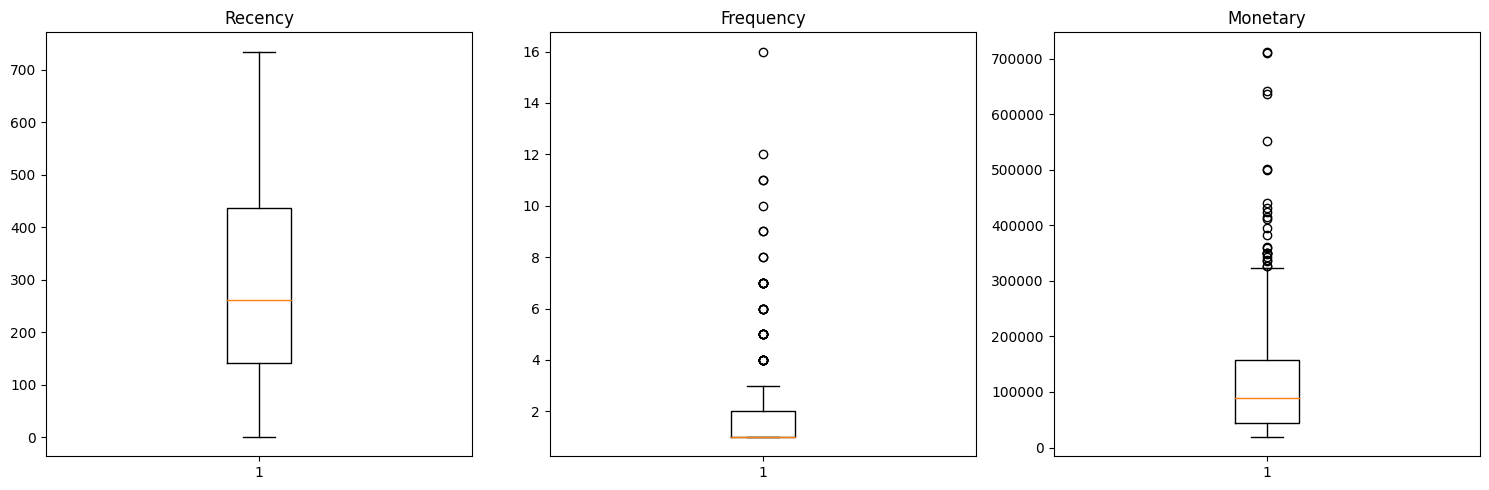

In [ ]:
# Buat figure dan axis
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 baris, 3 kolom

# Boxplot untuk 'recency'
axs[0].boxplot(rfm['recency'])
axs[0].set_title('Recency')

# Boxplot untuk 'frequency'
axs[1].boxplot(rfm['frequency'])
axs[1].set_title('Frequency')

# Boxplot untuk 'monetary'
axs[2].boxplot(rfm['monetary'])
axs[2].set_title('Monetary')

# Atur layout
plt.tight_layout()
plt.show()

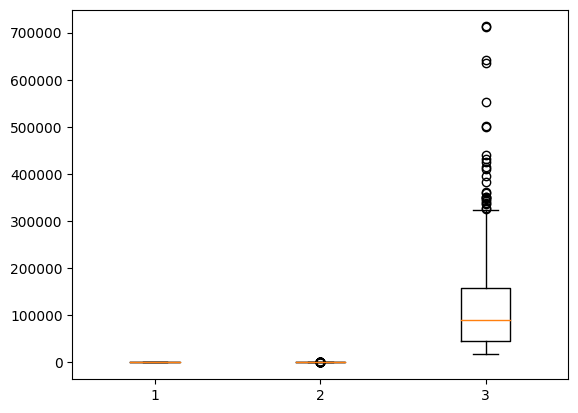

In [ ]:
plt.boxplot(rfm[['recency', 'frequency', 'monetary']])
plt.show()

In [ ]:
# Handling Outliar
# Z-Score
columns = ['monetary']

for i in columns:
    upper_limit = rfm[i].mean() + 3*rfm[i].std()
    lower_limit = rfm[i].mean() - 3*rfm[i].std()

    rfm[i] = np.where(
        rfm[i]>upper_limit,
        upper_limit,
        np.where(
            rfm[i]<lower_limit,
            lower_limit,
           rfm[i]
        )
    )

<ipython-input-24-6bd24d480def>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm[i] = np.where(


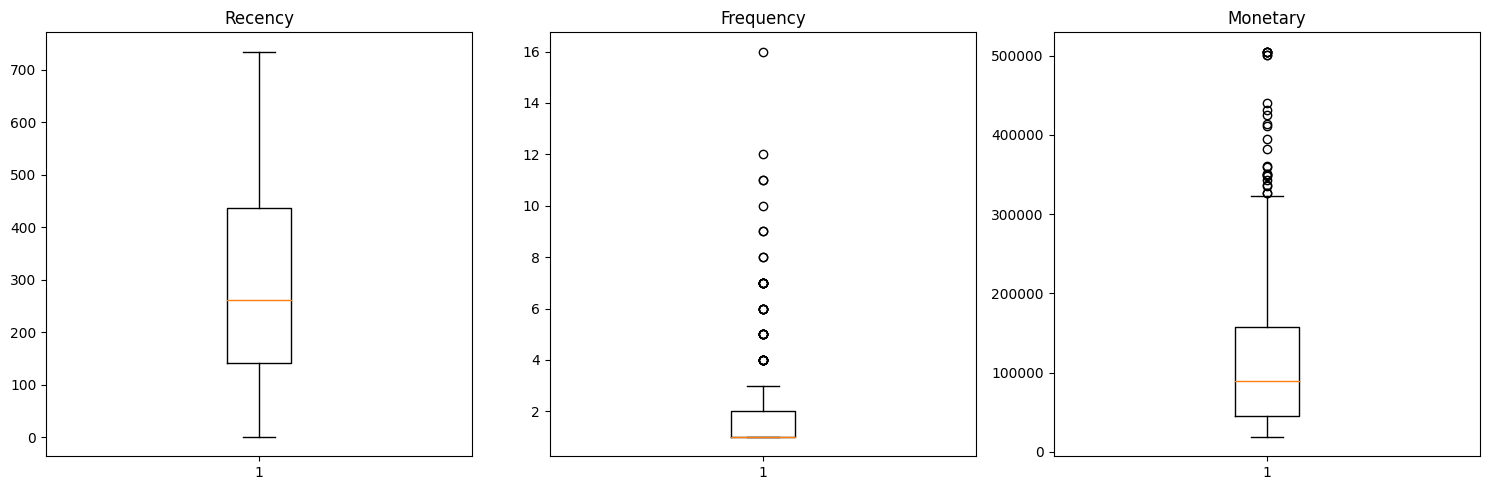

In [ ]:
# Buat figure dan axis
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 baris, 3 kolom

# Boxplot untuk 'recency'
axs[0].boxplot(rfm['recency'])
axs[0].set_title('Recency')

# Boxplot untuk 'frequency'
axs[1].boxplot(rfm['frequency'])
axs[1].set_title('Frequency')

# Boxplot untuk 'monetary'
axs[2].boxplot(rfm['monetary'])
axs[2].set_title('Monetary')

# Atur layout
plt.tight_layout()
plt.show()

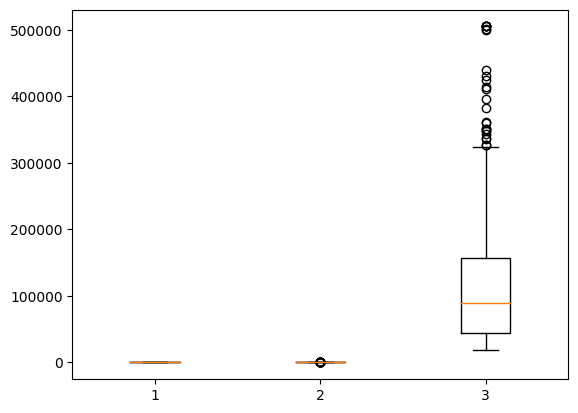

In [ ]:
plt.boxplot(rfm[['recency', 'frequency', 'monetary']])
plt.show()

## **EDA RFM**

In [ ]:
# Hitung korelasi antara variabel RFM
correlation = df[['recency', 'frequency', 'monetary']].corr()

print("Korelasi antara variabel RFM:")
print(correlation)

Korelasi antara variabel RFM:
            recency  frequency  monetary
recency    1.000000  -0.425580 -0.386677
frequency -0.425580   1.000000  0.897782
monetary  -0.386677   0.897782  1.000000


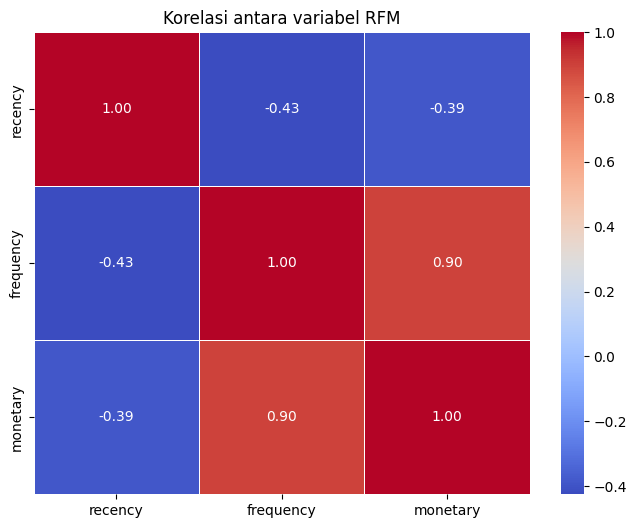

In [ ]:
# Plot heatmap dari matriks korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(data=correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Korelasi antara variabel RFM')

plt.show()

In [ ]:
correlation.describe()

,recency,frequency,monetary
count,3.000000,3.000000,3.000000
mean,0.062581,0.490734,0.503702
std,0.812062,0.795195,0.772782
min,-0.425580,-0.425580,-0.386677
25%,-0.406128,0.236101,0.255553
50%,-0.386677,0.897782,0.897782
75%,0.306662,0.948891,0.948891
max,1.000000,1.000000,1.000000


# **Build Ranking for RFM**

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
rfm1 = rfm[['recency', 'frequency', 'monetary']]

In [ ]:
quantiles = rfm1.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,monetary
0.25,141.0,1.0,45000.0
0.50,262.0,1.0,90000.0
0.75,436.0,2.0,157500.0


In [ ]:
quantiles.to_dict()

{'recency': {0.25: 141.0, 0.5: 262.0, 0.75: 436.0},
 'frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 2.0},
 'monetary': {0.25: 45000.0, 0.5: 90000.0, 0.75: 157500.0}}

In [ ]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [ ]:
#create rfm segmentation table
rfm_segmentation = rfm1
rfm_segmentation['R_Quartile'] = rfm_segmentation['recency'].apply(RScore, args=('recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['frequency'].apply(FMScore, args=('frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['monetary'].apply(FMScore, args=('monetary',quantiles,))

In [ ]:
rfm_segmentation.head()

,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile
0,56,2,234000.0,4,3,4
1,0,1,63630.0,4,1,2
2,211,1,45000.0,3,1,1
3,393,2,224500.0,2,3,4
4,609,1,42000.0,1,1,1


In [ ]:
rfm_segmentation['RFM_Scores'] = rfm_segmentation.R_Quartile.apply(str) + rfm_segmentation.F_Quartile.apply(str) + rfm_segmentation.M_Quartile.apply(str)
rfm_segmentation.head()

,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Scores
0,56,2,234000.0,4,3,4,434
1,0,1,63630.0,4,1,2,412
2,211,1,45000.0,3,1,1,311
3,393,2,224500.0,2,3,4,234
4,609,1,42000.0,1,1,1,111


Method-1

- If RFM_Scores == '444', then "1-Best Customers"
- If RFM_Scores == 'X4X', then "2-Loyal Customers"
- If RFM_Scores == 'XX4', then "3-Big Spenders"
- If RFM_Scores == '244', then "4-Almost Lost"
- If RFM_Scores == '144', then "5-Lost Customers"
- If RFM_Scores == '111', then "6-Lost Cheap Customers"

In [ ]:
label = list(np.zeros(len(rfm_segmentation)))

for i in range(len(rfm_segmentation)):
    if rfm_segmentation['RFM_Scores'].iloc[i] =='444': label[i] = "1-Best Customers"
    elif rfm_segmentation['RFM_Scores'].iloc[i][1]=='4': label[i] = "2-Loyal Customers"
    elif rfm_segmentation['RFM_Scores'].iloc[i][2]=='4': label[i] = "3-Big Spenders"
    elif rfm_segmentation['RFM_Scores'].iloc[i]=='244' : label[i] = "4-Almost Lost"
    elif rfm_segmentation['RFM_Scores'].iloc[i]=='144' : label[i] = "5-Lost Customers"
    elif rfm_segmentation['RFM_Scores'].iloc[i] =='111' : label[i] = "6-Lost Cheap Customers"

rfm_segmentation['RFM_Scores_Segments'] = label
rfm_segmentation

,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Scores,RFM_Scores_Segments
0,56,2,234000.0,4,3,4,434,3-Big Spenders
1,0,1,63630.0,4,1,2,412,0.0
2,211,1,45000.0,3,1,1,311,0.0
3,393,2,224500.0,2,3,4,234,3-Big Spenders
4,609,1,42000.0,1,1,1,111,6-Lost Cheap Customers
...,...,...,...,...,...,...,...,...
256,321,1,27000.0,2,1,1,211,0.0
257,173,1,72000.0,3,1,2,312,0.0
258,568,1,51000.0,1,1,2,112,0.0
259,638,1,18900.0,1,1,1,111,6-Lost Cheap Customers


In [ ]:
rfm_segmentation.RFM_Scores_Segments.value_counts()

,count
RFM_Scores_Segments,
0.0,154
2-Loyal Customers,34
6-Lost Cheap Customers,29
1-Best Customers,27
3-Big Spenders,17


In [ ]:
Loyal_Customers=['433']
Big_Spenders=['413','432','423']
Almost_Lost=['333','233','422','331','313','431','323']
Lost_Customers=['222','311','322','223','332','411','133','132','312','131','123','213','113','421','412','231','321','232']
Lost_Cheap_Customers=['122','211','112','121','212','221']

In [ ]:
for i in range(len(rfm_segmentation)):
    if rfm_segmentation['RFM_Scores'].iloc[i] in Loyal_Customers : label[i] = "2-Loyal Customers"
    elif rfm_segmentation['RFM_Scores'].iloc[i] in Big_Spenders : label[i] = "3-Big Spenders"
    elif rfm_segmentation['RFM_Scores'].iloc[i] in Almost_Lost : label[i] = "4-Almost Lost"
    elif rfm_segmentation['RFM_Scores'].iloc[i] in Lost_Customers : label[i] = "5-Lost Customers"
    elif rfm_segmentation['RFM_Scores'].iloc[i] in Lost_Cheap_Customers  : label[i] = "6-Lost Cheap Customers"

rfm_segmentation['RFM_Scores_Segments'] = label
rfm_segmentation

,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Scores,RFM_Scores_Segments
0,56,2,234000.0,4,3,4,434,3-Big Spenders
1,0,1,63630.0,4,1,2,412,5-Lost Customers
2,211,1,45000.0,3,1,1,311,5-Lost Customers
3,393,2,224500.0,2,3,4,234,3-Big Spenders
4,609,1,42000.0,1,1,1,111,6-Lost Cheap Customers
...,...,...,...,...,...,...,...,...
256,321,1,27000.0,2,1,1,211,6-Lost Cheap Customers
257,173,1,72000.0,3,1,2,312,5-Lost Customers
258,568,1,51000.0,1,1,2,112,6-Lost Cheap Customers
259,638,1,18900.0,1,1,1,111,6-Lost Cheap Customers


In [ ]:
rfm_segmentation.RFM_Scores_Segments.value_counts().sort_index()

,count
RFM_Scores_Segments,
1-Best Customers,27
2-Loyal Customers,42
3-Big Spenders,22
4-Almost Lost,20
5-Lost Customers,66
6-Lost Cheap Customers,84


In [ ]:
rfm_segmentation.groupby('RFM_Scores_Segments').agg({'recency': ['mean','median','min','max'],
                                           'frequency': ['mean','median','min','max'],
                                           'monetary': ['mean','median','min','max','count']}).round(1)

recency                  frequency                 \
                          mean median  min  max      mean median min max   
RFM_Scores_Segments                                                        
1-Best Customers          64.9   51.0   37  140       6.8    7.0   3  16   
2-Loyal Customers        204.2  195.5   42  631       3.8    3.0   2  10   
3-Big Spenders           256.7  250.0   42  575       1.7    2.0   1   2   
4-Almost Lost            257.2  241.0  161  426       1.8    2.0   1   2   
5-Lost Customers         233.3  202.5    0  647       1.1    1.0   1   2   
6-Lost Cheap Customers   500.8  524.5  269  735       1.0    1.0   1   1   

                        monetary                                      
                            mean    median       min       max count  
RFM_Scores_Segments                                                   
1-Best Customers        353434.0  342900.0  159000.0  505179.5    27  
2-Loyal Customers       201282.8  157000.0   96000.0  505179.5    42  
3-Big Spenders          186154.5  170200.0   63900.0  361000.0    22  
4-Almost Lost           125070.0  120000.0   96000.0  156000.0    20  
5-Lost Customers         66176.2   51000.0   18900.0  157500.0    66  
6-Lost Cheap Customers   53128.6   45000.0   18900.0   90000.0    84

 **Interpretasi**

Interpretasi dari hasil perhitungan RFM menggunakan metode ranking atau score memberikan pemahaman mengenai perilaku pelanggan berdasarkan tiga metrik utama: Recency (kapan terakhir kali pelanggan berbelanja), Frequency (seberapa sering pelanggan berbelanja), dan Monetary (jumlah uang yang dihabiskan pelanggan).

1. Best Customers
 - Recency: Pelanggan dalam kategori ini baru-baru ini melakukan pembelian (mean 140.4 hari, median 170.0 hari), menunjukkan mereka sering berinteraksi dengan bisnis.
 - Frequency: Mereka juga membeli lebih sering (mean 5.3 kali, median 5.0 kali).
 - Monetary: Mereka menghabiskan uang paling banyak (mean 311534.3, median 317750.3).
- Interpretasi: Pelanggan terbaik ini sangat berharga, dengan pembelian sering dan pengeluaran besar. Mereka mungkin merupakan target utama untuk program loyalitas dan promosi eksklusif.

2. Loyal Customers
 - Recency: Mereka cukup baru berbelanja (mean 427 hari, median 397 hari).
 - Frequency: Membeli cukup sering (mean 4.9 kali, median 4.0 kali).
 - Monetary: Pengeluaran mereka juga signifikan (mean 249798.5, median 214750.0).
- Interpretasi: Pelanggan yang loyal ini konsisten dalam berbelanja dan memberikan kontribusi finansial yang signifikan. Mereka adalah target yang baik untuk penawaran berkelanjutan dan insentif loyalitas.

3. Big Spenders
 - Recency: Pelanggan ini telah melakukan pembelian dalam waktu yang lebih baru (mean 284 hari, median 193 hari).
 - Frequency: Membeli dengan frekuensi rendah (mean 1.6 kali, median 2.0 kali).
 - Monetary: Namun, mereka menghabiskan banyak uang (mean 1187387.0, median 169,000.0).
- Interpretasi: Meskipun mereka tidak sering berbelanja, pengeluaran mereka besar ketika mereka melakukannya. Fokus promosi atau produk premium mungkin efektif untuk kelompok ini.

4. Almost Lost
 - Recency: Mereka belum lama ini berbelanja, tetapi sudah mulai jarang (mean 309.1 hari, median 283.0 hari).
 - Frequency: Frekuensi pembelian rendah (mean 1.8 kali, median 2.0 kali).
 - Monetary: Pengeluaran mereka cukup signifikan (mean 129011.8, median 129900.0).
- Interpretasi: Pelanggan ini berisiko hilang, tetapi masih ada kesempatan untuk mengaktifkan kembali mereka. Penawaran atau diskon khusus mungkin diperlukan untuk menarik mereka kembali.

5. Lost Customers
 - Recency: Mereka sudah lama tidak berbelanja (mean 519.3 hari, median 524.5 hari).
 - Frequency: Frekuensi pembelian sangat rendah (mean 1.1 kali, median 1.0 kali).
 - Monetary: Pengeluaran mereka relatif rendah (mean 49774.7, median 54,000.0).
- Interpretasi: Pelanggan ini sudah tidak aktif dan kemungkinan besar tidak akan kembali tanpa upaya pemasaran yang signifikan. Penawaran yang sangat menarik atau komunikasi langsung mungkin diperlukan untuk memulihkan mereka.

6. Lost Cheap Customers
 - Recency: Mereka sudah sangat lama tidak berbelanja (mean 524.9 hari, median 542.0 hari).
 - Frequency: Membeli sangat jarang (mean 1.0 kali, median 1.0 kali).
 - Monetary: Pengeluaran mereka sangat rendah (mean 52,634.3, median 45,000.0).
- Interpretasi: Pelanggan ini sudah tidak aktif dan memiliki nilai yang lebih rendah bagi bisnis. Upaya untuk memulihkan mereka mungkin tidak ekonomis, tetapi tetap ada kesempatan untuk mengirimkan penawaran khusus untuk menarik mereka kembali.

 **Kesimpulan dan Strategi**

Berdasarkan analisis RFM yang telah dilakukan, berikut adalah kesimpulan dari setiap segmen pelanggan:

1. Best Customers:

- Karakteristik: Baru-baru ini berbelanja, sering berbelanja, dan menghabiskan banyak uang.
- Strategi: Fokus pada program loyalitas dan promosi eksklusif untuk mempertahankan mereka.
2. Loyal Customers:

- Karakteristik: Konsisten berbelanja dengan frekuensi tinggi dan pengeluaran signifikan.
- Strategi: Berikan insentif loyalitas berkelanjutan untuk mempertahankan dan meningkatkan hubungan dengan mereka.
3. Big Spenders:

- Karakteristik: Tidak sering berbelanja tetapi mengeluarkan banyak uang ketika melakukannya.
- Strategi: Tawarkan produk premium atau promosi khusus untuk mendorong pembelian lebih sering.
4. Almost Lost:

- Karakteristik: Baru-baru ini berbelanja tetapi jarang berbelanja dan berisiko hilang.
- Strategi: Aktifkan kembali dengan penawaran khusus atau diskon untuk menarik mereka kembali.
5. Lost Customers:

- Karakteristik: Sudah lama tidak berbelanja dengan frekuensi sangat rendah dan pengeluaran rendah.
- Strategi: Lakukan upaya pemasaran yang signifikan atau komunikasi langsung untuk memulihkan mereka, namun pertimbangkan biaya vs potensi keuntungan.
6. Lost Cheap Customers:

- Karakteristik: Sudah sangat lama tidak berbelanja dengan frekuensi dan pengeluaran sangat rendah.
- Strategi: Pertimbangkan apakah upaya pemulihan ekonomis, namun mungkin kirimkan penawaran khusus sebagai langkah terakhir.

 **Rekomendasi Umum**

1. Pelanggan Terbaik dan Loyal: Fokus pada retensi dan penguatan hubungan dengan pelanggan ini melalui program loyalitas, penghargaan, dan promosi eksklusif.
2. Pelanggan Besar: Promosikan produk premium dan lakukan upaya untuk meningkatkan frekuensi pembelian mereka.
3. Pelanggan Hampir Hilang: Upayakan strategi reaktivasi dengan penawaran menarik untuk menarik mereka kembali.
4. Pelanggan Hilang: Pertimbangkan biaya dan manfaat dalam upaya pemulihan, mungkin berfokus pada kampanye pemasaran ulang yang spesifik.
5. Pelanggan Murah yang Hilang: Evaluasi apakah upaya pemulihan bernilai, mungkin lebih baik mengalihkan sumber daya untuk mempertahankan pelanggan yang lebih bernilai.

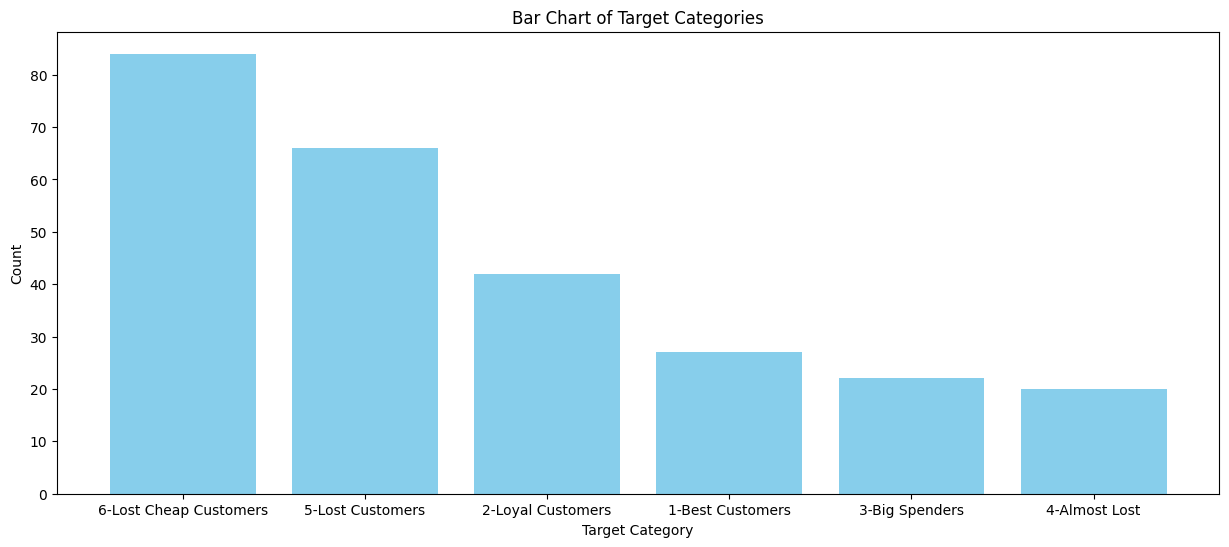

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah masing-masing kategori pada kolom 'Target'
target_counts = rfm_segmentation['RFM_Scores_Segments'].value_counts()

# Plot bar chart
plt.figure(figsize=(15, 6))
plt.bar(target_counts.index, target_counts.values, color='skyblue')
plt.xlabel('Target Category')
plt.ylabel('Count')
plt.title('Bar Chart of Target Categories')
plt.show()

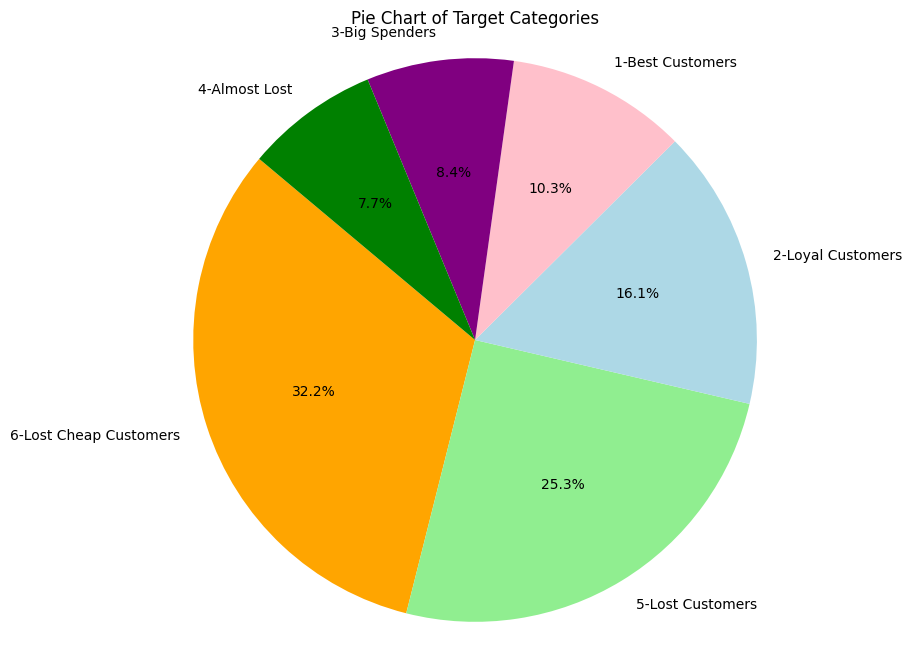

In [ ]:
# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140, colors=['orange', 'lightgreen', 'lightblue', 'pink', 'purple', 'green'])
plt.axis('equal')  # Membuat lingkaran berbentuk lingkaran
plt.title('Pie Chart of Target Categories')
plt.show()


# Modeling

In [ ]:
# import required libraries for dataframe and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Scalling

Variabel X

In [ ]:
X = rfm[['recency', 'frequency', 'monetary']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform rfmd
x_scaled = scaler.fit_transform(X)

# Convert to DataFrame
x_scaled = pd.DataFrame(x_scaled, columns=['recency', 'frequency', 'monetary'])
x_scaled.head()


,recency,frequency,monetary
0,0.076190,0.066667,0.442338
1,0.000000,0.000000,0.091984
2,0.287075,0.000000,0.053673
3,0.534694,0.066667,0.422802
4,0.828571,0.000000,0.047504


In [ ]:
x_scaled.head(10)

,recency,frequency,monetary
0,0.076190,0.066667,0.442338
1,0.000000,0.000000,0.091984
2,0.287075,0.000000,0.053673
3,0.534694,0.066667,0.422802
4,0.828571,0.000000,0.047504
5,0.390476,0.000000,0.094596
6,0.379592,0.133333,0.217159
7,0.061224,0.266667,0.681501
8,0.614966,0.000000,0.038250
9,0.272109,0.000000,0.007403


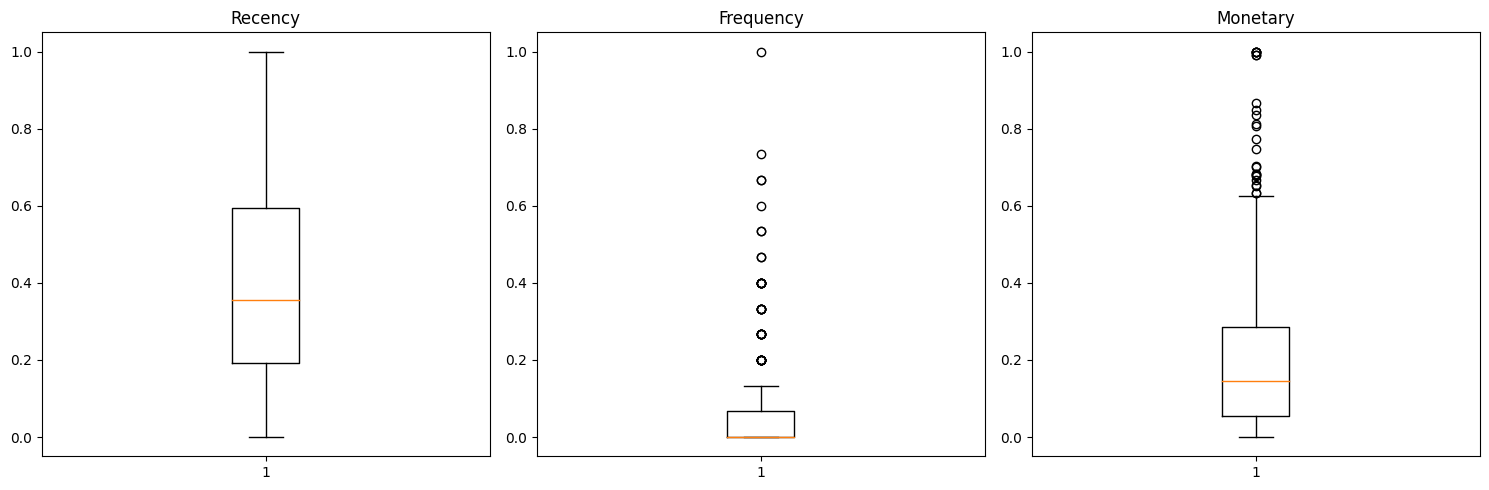

In [ ]:
# Buat figure dan axis
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 baris, 3 kolom

# Boxplot untuk 'recency'
axs[0].boxplot(x_scaled['recency'])
axs[0].set_title('Recency')

# Boxplot untuk 'frequency'
axs[1].boxplot(x_scaled['frequency'])
axs[1].set_title('Frequency')

# Boxplot untuk 'monetary'
axs[2].boxplot(x_scaled['monetary'])
axs[2].set_title('Monetary')

# Atur layout
plt.tight_layout()
plt.show()

## 5 model

In [ ]:
import numpy as np
import pandas as pd
import itertools
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from itertools import product
import seaborn as sns
import matplotlib.pyplot as plt


# Placeholder for results
silhouette_scores_rfm = {
    'method': 'RFM',
    'kmeans': None,
    'dbscan': None,
    'kmedoids': None,
    'agglo': None,
    'gaussian': None,

}


labels_rfm = {
    'kmeans_label': None,
    'dbscan_label': None,
    'kmedoids_label': None,
    'agglo_label': None,
    'gaussian_label': None,

}


# Fungsi untuk menghitung matriks
def compute_metrics(data, labels, method_name):
    sil_score = silhouette_score(data, labels)
    calinski_score = calinski_harabasz_score(data, labels)
    davies_score = davies_bouldin_score(data, labels)

    return {
        "Method": method_name,
        "Silhouette Score": sil_score,
        "Calinski Harabasz Score": calinski_score,
        "Davies Bouldin Score": davies_score
    }

# Fungsi-fungsi untuk klastering dan skoring silhouette
def kmeans_clustering(data, range_n_clusters):
    best_score = -1
    best_labels = None

    for num_clusters in range_n_clusters:
        model = KMeans(n_clusters=num_clusters, max_iter=50)
        model.fit(data)
        labels = model.labels_
        score = silhouette_score(data, labels)
        print(f"For n_clusters={num_clusters}, the silhouette score is {score}")

        if score > best_score:
            best_score = score
            best_labels = labels

    return best_score, best_labels

def dbscan_clustering(data, epsilon, min_samples):
    combinations = list(itertools.product(epsilon, min_samples))

    def grid_search(combinations, X):
        scores = []
        all_labels = []

        for eps, num_samples in combinations:
            model = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
            labels = model.labels_
            num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

            if num_clusters < 2 or num_clusters > 25:
                scores.append(-20)
                all_labels.append("poor")
            else:
                scores.append(silhouette_score(X, labels))
                all_labels.append(labels)

        best_index = np.argmax(scores)
        best_parameters = combinations[best_index]
        best_labels = all_labels[best_index]
        best_score = scores[best_index]

        return best_score, best_labels

    return grid_search(combinations, data)

def kmedoids_clustering(data, param_grid):
    results = []

    for params in product(*param_grid.values()):
        param_dict = dict(zip(param_grid.keys(), params))
        model = KMedoids(n_clusters=param_dict['n_clusters'],
                         metric=param_dict['metric'],
                         max_iter=param_dict['max_iter'])
        labels = model.fit_predict(data)
        score = silhouette_score(data, labels)

        results.append({
            'n_clusters': param_dict['n_clusters'],
            'metric': param_dict['metric'],
            'max_iter': param_dict['max_iter'],
            'silhouette_score': score,
            'labels': labels
        })

    results_df = pd.DataFrame(results)
    best_params = results_df.loc[results_df['silhouette_score'].idxmax()]

    return best_params['silhouette_score'], best_params['labels']

def agglomerative_clustering(data, param_grid):
    results = []

    for params in product(*param_grid.values()):
        param_dict = dict(zip(param_grid.keys(), params))
        affinity_options = ['euclidean'] if param_dict['linkage'] == 'ward' else ['euclidean', 'manhattan', 'cosine']

        for affinity in affinity_options:
            model = AgglomerativeClustering(n_clusters=param_dict['n_clusters'],
                                            affinity=affinity,
                                            linkage=param_dict['linkage'])
            labels = model.fit_predict(data)
            score = silhouette_score(data, labels)

            results.append({
                'n_clusters': param_dict['n_clusters'],
                'affinity': affinity,
                'linkage': param_dict['linkage'],
                'silhouette_score': score,
                'labels': labels
            })

    results_df = pd.DataFrame(results)
    best_params = results_df.loc[results_df['silhouette_score'].idxmax()]

    return best_params['silhouette_score'], best_params['labels']

def gaussian_mixture_clustering(data, n_components_range):
    results = []

    for n_components in n_components_range:
        model = GaussianMixture(n_components=n_components, random_state=42)
        labels = model.fit_predict(data)
        num_clusters = len(set(labels))

        if num_clusters > 1:
            score = silhouette_score(data, labels)
            results.append({
                'n_components': n_components,
                'silhouette_score': score,
                'labels': labels
            })

    results_df = pd.DataFrame(results)
    best_params = results_df.loc[results_df['silhouette_score'].idxmax()]

    return best_params['silhouette_score'], best_params['labels']


# Clustering and silhouette scoring for RFM data
silhouette_scores_rfm['kmeans'], labels_rfm['kmeans_label'] = kmeans_clustering(x_scaled, [2, 3, 4, 5, 6, 7, 8])
silhouette_scores_rfm['dbscan'], labels_rfm['dbscan_label'] = dbscan_clustering(x_scaled, np.linspace(0.01, 1, num=10), np.arange(2, 10, step=1))
silhouette_scores_rfm['kmedoids'], labels_rfm['kmedoids_label'] = kmedoids_clustering(x_scaled, {'n_clusters': [2, 3, 4, 5], 'metric': ['euclidean', 'manhattan'], 'max_iter': [50, 100, 200]})
silhouette_scores_rfm['agglo'], labels_rfm['agglo_label'] = agglomerative_clustering(x_scaled, {'n_clusters': [2, 3, 4, 5], 'linkage': ['ward', 'complete', 'average', 'single']})
silhouette_scores_rfm['gaussian'], labels_rfm['gaussian_label'] = gaussian_mixture_clustering(x_scaled, range(2, 11))  # Masukkan y=None sebagai nilai target


# Menggabungkan silhouette scores RFM
silhouette_scores = pd.DataFrame([silhouette_scores_rfm])

# Menghitung Clustering Matriks
clustering_metrics_rfm = []


clustering_metrics_rfm.append(compute_metrics(x_scaled, labels_rfm['kmeans_label'], 'KMeans'))
clustering_metrics_rfm.append(compute_metrics(x_scaled, labels_rfm['dbscan_label'], 'DBSCAN'))
clustering_metrics_rfm.append(compute_metrics(x_scaled, labels_rfm['kmedoids_label'], 'KMedoids'))
clustering_metrics_rfm.append(compute_metrics(x_scaled, labels_rfm['agglo_label'], 'Agglomerative'))
clustering_metrics_rfm.append(compute_metrics(x_scaled, labels_rfm['gaussian_label'], 'Gaussian Mixture'))


# Membuat tabel Matriks
table_data = []

for metrics in clustering_metrics_rfm:
    table_data.append(["RFM", metrics["Method"], metrics["Silhouette Score"], metrics["Calinski Harabasz Score"], metrics["Davies Bouldin Score"]])


df_metrics = pd.DataFrame(table_data, columns=["Data Type", "Method", "Silhouette Score", "Calinski Harabasz Score", "Davies Bouldin Score"])

print(df_metrics.to_string(index=False))

# Add clustering labels to original dataframes
df_result = df.copy()

df_result['KMeans_rfm'] = labels_rfm['kmeans_label']
df_result['DBSCAN_rfm'] = labels_rfm['dbscan_label']
df_result['KMedoids_rfm'] = labels_rfm['kmedoids_label']
df_result['Agglomerative_rfm'] = labels_rfm['agglo_label']
df_result['Gaussian_rfm'] = labels_rfm['gaussian_label']


# Calculate cluster counts for RFM
cluster_counts_rfm = df_result[['KMeans_rfm', 'DBSCAN_rfm', 'KMedoids_rfm', 'Agglomerative_rfm', 'Gaussian_rfm']].apply(pd.Series.value_counts).fillna(0)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

For n_clusters=2, the silhouette score is 0.4149610305500613
For n_clusters=3, the silhouette score is 0.5021512577618147
For n_clusters=4, the silhouette score is 0.44344576501774213
For n_clusters=5, the silhouette score is 0.4115437115457569


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=6, the silhouette score is 0.414767936053628
For n_clusters=7, the silhouette score is 0.42262329435999163
For n_clusters=8, the silhouette score is 0.4060463923955574


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and wi

Data Type           Method  Silhouette Score  Calinski Harabasz Score  Davies Bouldin Score
      RFM           KMeans          0.502151               348.506859              0.678855
      RFM           DBSCAN          0.438378                63.851703              1.509659
      RFM         KMedoids          0.464557               293.978417              0.775480
      RFM    Agglomerative          0.557384                67.405723              0.464346
      RFM Gaussian Mixture          0.297105               133.055066              1.231611


In [ ]:
df_metrics

,Data Type,Method,Silhouette Score,Calinski Harabasz Score,Davies Bouldin Score
0,RFM,KMeans,0.502151,348.506859,0.678855
1,RFM,DBSCAN,0.438378,63.851703,1.509659
2,RFM,KMedoids,0.464557,293.978417,0.775480
3,RFM,Agglomerative,0.557384,67.405723,0.464346
4,RFM,Gaussian Mixture,0.297105,133.055066,1.231611


In [ ]:
cluster_counts_rfm

,KMeans_rfm,DBSCAN_rfm,KMedoids_rfm,Agglomerative_rfm,Gaussian_rfm
-1,0.0,11,0.0,0.0,0.0
0,140.0,228,127.0,253.0,105.0
1,84.0,19,74.0,8.0,156.0
2,37.0,3,60.0,0.0,0.0


In [ ]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 261 entries, 0 to 260
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             261 non-null    object        
 1   tanggal pemesanan   261 non-null    datetime64[ns]
 2   tanggal pembayaran  261 non-null    datetime64[ns]
 3   metode pembayaran   261 non-null    object        
 4   frequency           261 non-null    int64         
 5   monetary            261 non-null    int64         
 6   recency             261 non-null    int64         
 7   KMeans_rfm          261 non-null    int32         
 8   DBSCAN_rfm          261 non-null    int64         
 9   KMedoids_rfm        261 non-null    int64         
 10  Agglomerative_rfm   261 non-null    int64         
 11  Gaussian_rfm        261 non-null    int64         
dtypes: datetime64[ns](2), int32(1), int64(7), object(2)
memory usage: 25.5+ KB


In [ ]:
df_result.head()

,user_id,tanggal pemesanan,tanggal pembayaran,metode pembayaran,frequency,monetary,recency,KMeans_rfm,DBSCAN_rfm,KMedoids_rfm,Agglomerative_rfm,Gaussian_rfm
0,0001,2022-04-18,2022-04-18,ShopeePay,2,234000,56,0,-1,2,0,0
1,0002,2022-04-22,2022-04-22,ShopeePay,1,63630,0,0,0,0,0,1
2,0003,2022-04-25,2022-04-25,ShopeePay,1,45000,211,0,0,0,0,1
3,0004,2022-04-25,2022-04-25,ShopeePay,2,224500,393,0,0,0,0,0
4,0005,2022-04-26,2022-04-26,ShopeePay,1,42000,609,1,0,1,0,1


# Analisis Visualisasi

## Perbandingan Matriks

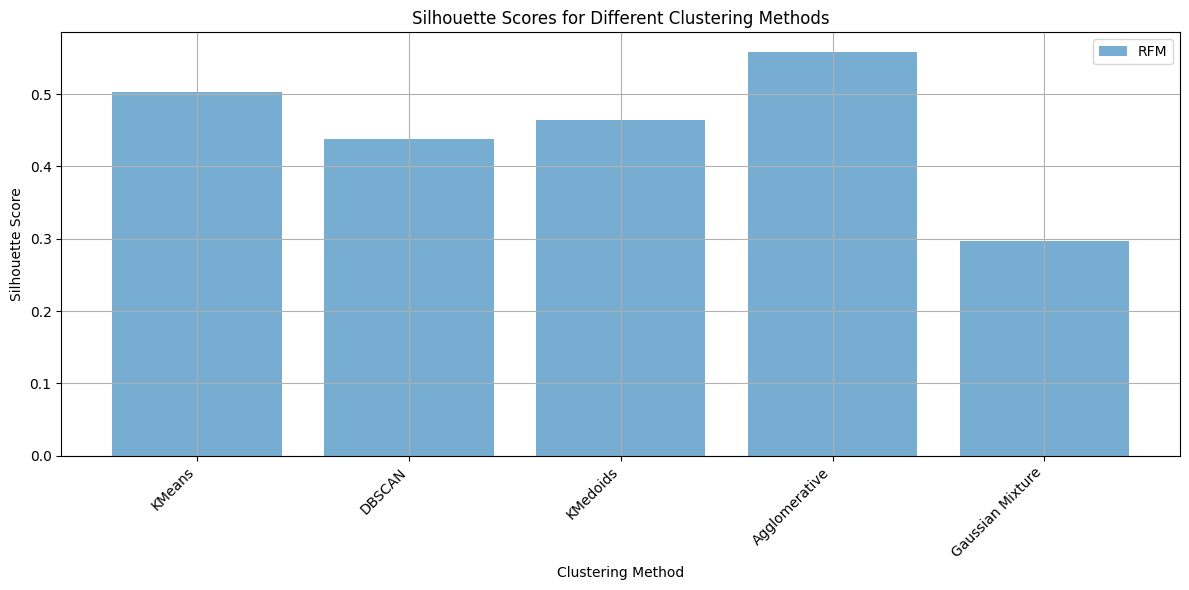

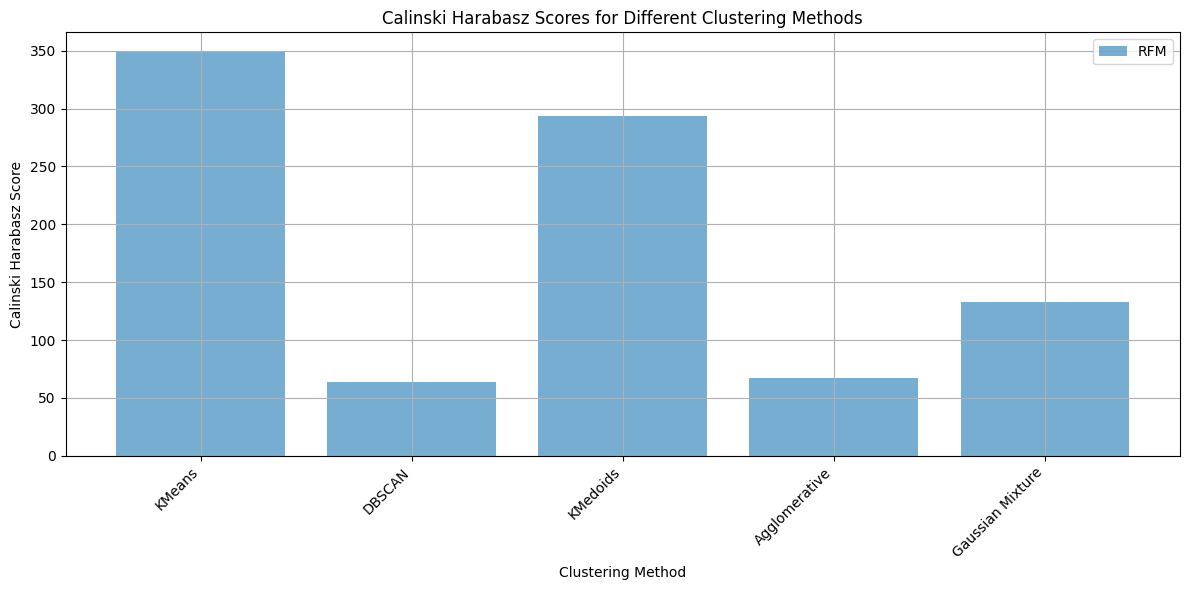

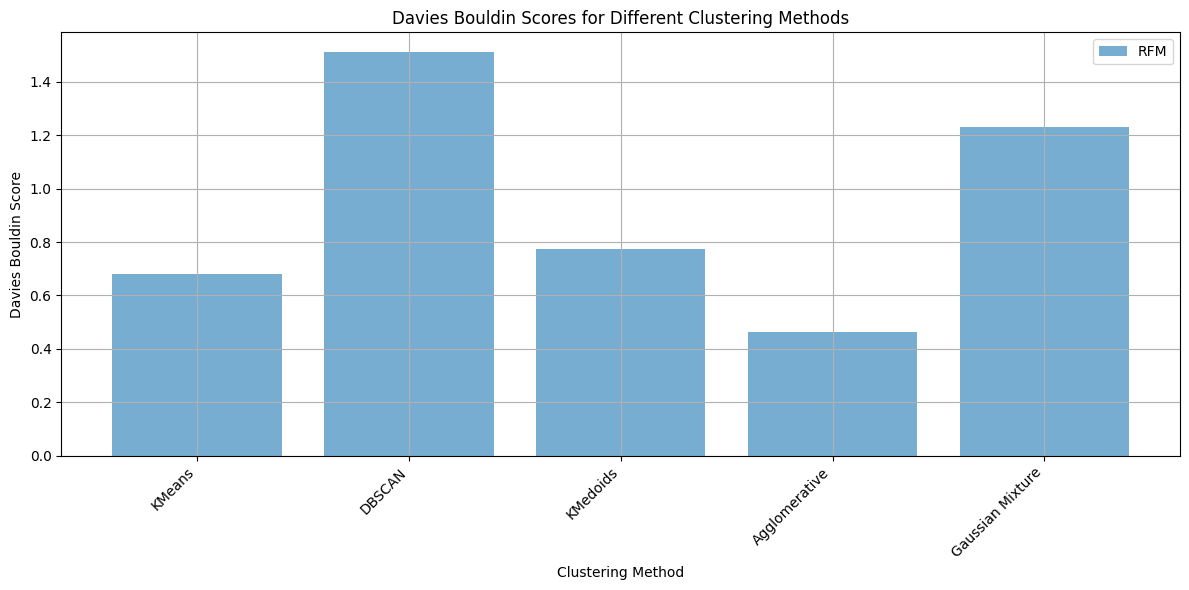

In [ ]:
import matplotlib.pyplot as plt

# Assuming df_metrics is your DataFrame containing clustering metrics

# Plotting Silhouette Scores
plt.figure(figsize=(12, 6))
for data_type in df_metrics['Data Type'].unique():
    subset = df_metrics[df_metrics['Data Type'] == data_type]
    plt.bar(subset['Method'], subset['Silhouette Score'], label=data_type, alpha=0.6)

plt.title('Silhouette Scores for Different Clustering Methods')
plt.xlabel('Clustering Method')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting Calinski Harabasz Scores
plt.figure(figsize=(12, 6))
for data_type in df_metrics['Data Type'].unique():
    subset = df_metrics[df_metrics['Data Type'] == data_type]
    plt.bar(subset['Method'], subset['Calinski Harabasz Score'], label=data_type, alpha=0.6)

plt.title('Calinski Harabasz Scores for Different Clustering Methods')
plt.xlabel('Clustering Method')
plt.ylabel('Calinski Harabasz Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting Davies Bouldin Index
plt.figure(figsize=(12, 6))
for data_type in df_metrics['Data Type'].unique():
    subset = df_metrics[df_metrics['Data Type'] == data_type]
    plt.bar(subset['Method'], subset['Davies Bouldin Score'], label=data_type, alpha=0.6)

plt.title('Davies Bouldin Scores for Different Clustering Methods')
plt.xlabel('Clustering Method')
plt.ylabel('Davies Bouldin Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


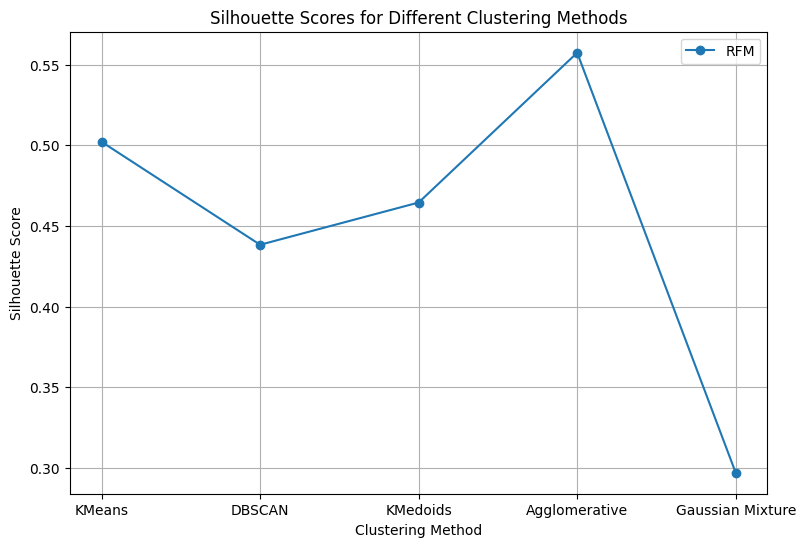

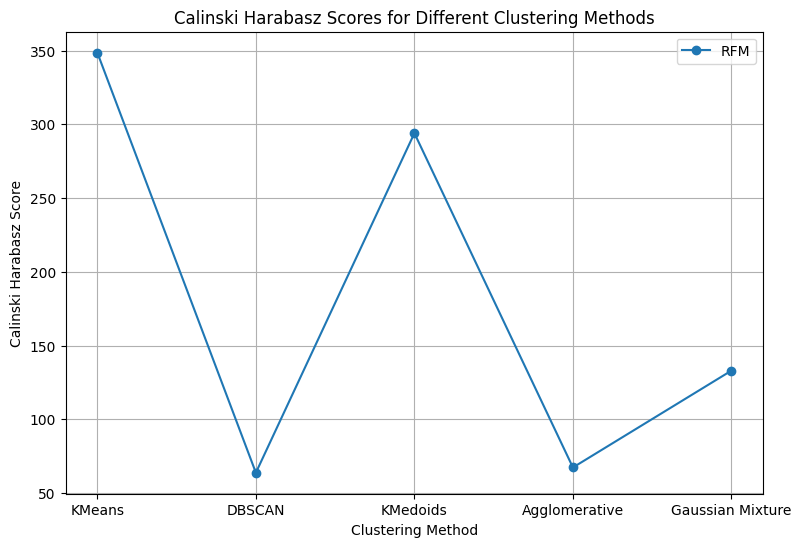

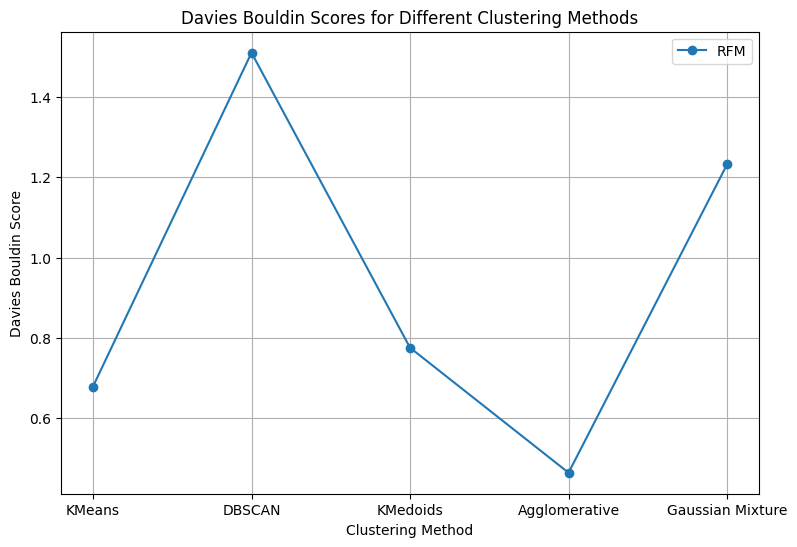

In [ ]:
import matplotlib.pyplot as plt

# Assuming df_metrics is your DataFrame containing clustering metrics

# Plotting Silhouette Scores
plt.figure(figsize=(9, 6))
for data_type in df_metrics['Data Type'].unique():
    subset = df_metrics[df_metrics['Data Type'] == data_type]
    plt.plot(subset['Method'], subset['Silhouette Score'], marker='o', label=data_type)

plt.title('Silhouette Scores for Different Clustering Methods')
plt.xlabel('Clustering Method')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Calinski Harabasz Scores
plt.figure(figsize=(9, 6))
for data_type in df_metrics['Data Type'].unique():
    subset = df_metrics[df_metrics['Data Type'] == data_type]
    plt.plot(subset['Method'], subset['Calinski Harabasz Score'], marker='o', label=data_type)

plt.title('Calinski Harabasz Scores for Different Clustering Methods')
plt.xlabel('Clustering Method')
plt.ylabel('Calinski Harabasz Score')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Davies Bouldin Index
plt.figure(figsize=(9, 6))
for data_type in df_metrics['Data Type'].unique():
    subset = df_metrics[df_metrics['Data Type'] == data_type]
    plt.plot(subset['Method'], subset['Davies Bouldin Score'], marker='o', label=data_type)

plt.title('Davies Bouldin Scores for Different Clustering Methods')
plt.xlabel('Clustering Method')
plt.ylabel('Davies Bouldin Score')
plt.legend()
plt.grid(True)
plt.show()



1. Silhouette Score:
- Agglomerative memiliki silhouette score tertinggi dengan nilai 0.557384. Ini menunjukkan bahwa model ini memiliki pemisahan yang baik antara kluster.
- Silhouette score mengukur seberapa baik objek dalam satu kluster berdekatan dengan objek dalam kluster lain.
2. Calinski-Harabasz Index:
- KMeans memiliki nilai tertinggi di antara model lain, yaitu 348.506859.
- Nilai Calinski yang paling tinggi menunjukkan bahwa mereka memiliki pemisahan yang serupa dalam data.
3. Davies-Bouldin Index (DBI):
- Agglomerative memiliki nilai DBI terendah, yaitu 0.464346. Ini menandakan bahwa model ini memiliki pemisahan yang lebih baik daripada model lainnya.
- DBI mengukur seberapa baik kluster terpisah dan seberapa homogen objek dalam kluster yang sama.

Karena hasil cluster pada algoritma Agglomerative memiliki hanya 1 customer di salah satu segmen atau bisa disebut hasil cluster pada agglomerative tidak seimbang, maka analisis akan dilanjutkan analisis model K Means.

## Visualisasi dan analisis statistik deskriptif untuk setiap klaster pada Model K-Means RFM

In [ ]:
import numpy as np
import plotly.graph_objs as go
import plotly.offline as py

# Warna yang akan digunakan untuk mewarnai klaster
colors = ['red', 'blue', 'green']

# Buat label untuk setiap titik data
labels = ['Cluster ' + str(cluster) for cluster in df_result['KMeans_rfm']]

# Kode Plotly 3D dari kode kedua
trace1 = go.Scatter3d(
    x=df['recency'],
    y=df['frequency'],
    z=df['monetary'],
    mode='markers',
    text=labels,  # Tambahkan label tooltip
    marker=dict(
        color=[colors[cluster] for cluster in df_result['KMeans_rfm']],
        size=10,
        line=dict(
            color=[colors[cluster] for cluster in df_result['KMeans_rfm']],
            width=5
        ),
        opacity=0.8
    )
)

data = [trace1]

layout = go.Layout(
    title='RFM KMeans Clusters',
    scene=dict(
        xaxis=dict(title='Recency'),
        yaxis=dict(title='Frequency'),
        zaxis=dict(title='Monetary')
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)




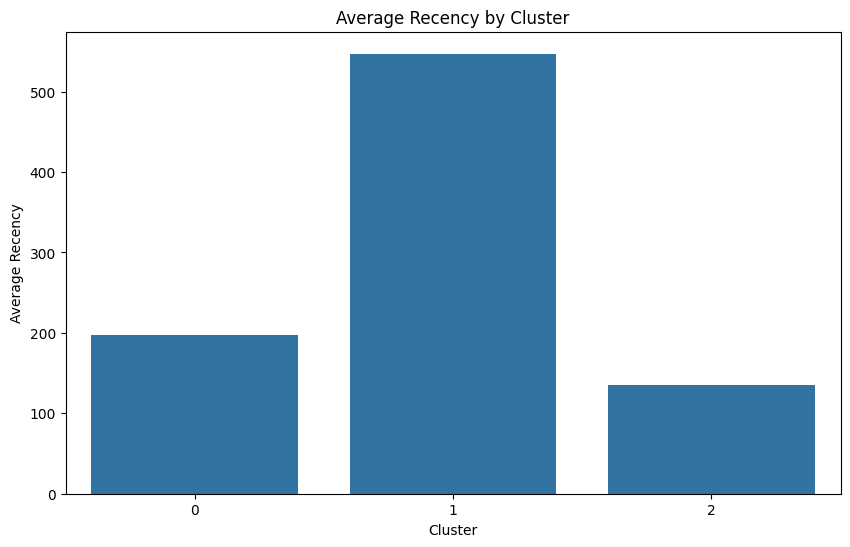

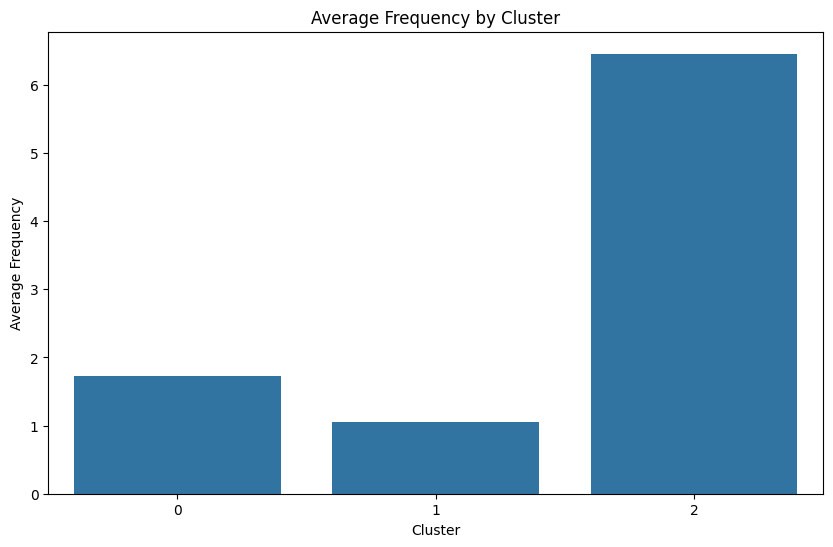

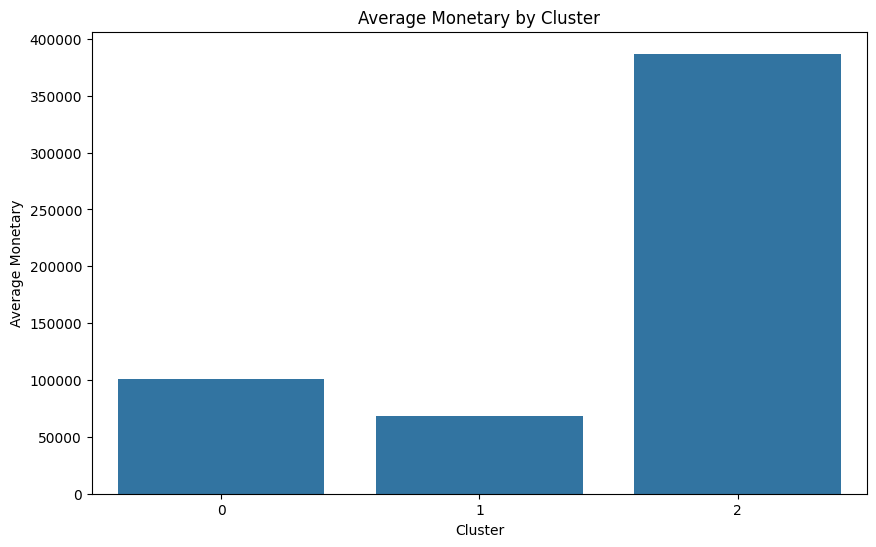

In [ ]:
# Menghitung rata-rata recency, frequency, dan monetary untuk setiap cluster
cluster_summary = df_result.groupby('KMeans_rfm').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean'
}).reset_index()

# Plot untuk Recency
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_summary, x='KMeans_rfm', y='recency')
plt.title('Average Recency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Recency')
plt.show()

# Plot untuk Frequency
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_summary, x='KMeans_rfm', y='frequency')
plt.title('Average Frequency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Frequency')
plt.show()

# Plot untuk Monetary
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_summary, x='KMeans_rfm', y='monetary')
plt.title('Average Monetary by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Monetary')
plt.show()


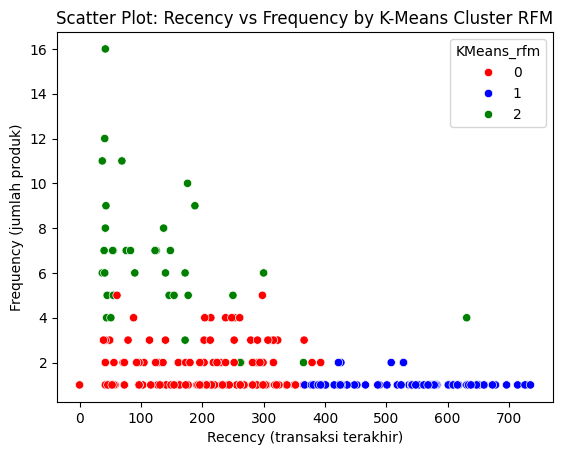

recency                         frequency                      \
              mean median  min  max    std      mean median min max  std   
KMeans_rfm                                                                 
0            197.4  206.0    0  393   95.2       1.7    1.0   1   5  1.0   
1            547.1  569.5  367  735   99.6       1.1    1.0   1   2  0.2   
2            135.0   90.0   37  631  122.5       6.5    6.0   1  16  3.0   

            monetary                                            
                mean    median     min     max       std count  
KMeans_rfm                                                      
0           100741.6   90000.0   18900  250000   58761.7   140  
1            68233.3   51000.0   18900  179500   38166.0    84  
2           386918.9  349900.0  234000  712900  125250.9    37

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tentukan palet warna secara manual
palette = {0: 'red', 1: 'blue', 2:'green'}

# Visualisasi scatter plot untuk recency, frequency, monetary, dan diversity
sns.scatterplot(data=df_result, x='recency', y='frequency', hue='KMeans_rfm', palette=palette)
plt.title('Scatter Plot: Recency vs Frequency by K-Means Cluster RFM')
plt.xlabel('Recency (transaksi terakhir)')
plt.ylabel('Frequency (jumlah produk)')
plt.show()

# Hitung statistik deskriptif untuk setiap klaster
cluster_stats_kmeans = df_result.groupby('KMeans_rfm').agg({'recency': ['mean','median','min','max', 'std'],
                                           'frequency': ['mean','median','min','max', 'std'],
                                           'monetary': ['mean','median','min','max', 'std','count']}).round(1)
cluster_stats_kmeans

### **Analisis Statistik dan Visualisasi**

1. Cluster 0 (Merah):

- Label: "High-Value Infrequent Buyers" (Pelanggan Bernilai Tinggi tapi Jarang Beli)

- Deskripsi:
  - Recency: Rata-rata 197.4, standar deviasi 95.2
  - Frekuensi: Rata-rata 1.7, standar deviasi 1.0
  - Moneter: Rata-rata 100,741.6, standar deviasi 58,761.7

  Pelanggan di cluster ini jarang melakukan pembelian (frekuensi rendah) tetapi ketika mereka membeli, mereka menghabiskan banyak uang (nilai moneter tinggi). Recency mereka menunjukkan bahwa mereka masih berhubungan dengan toko tetapi tidak terlalu aktif baru-baru ini.

- Rekomendasi: Berikan insentif untuk meningkatkan frekuensi pembelian, seperti program loyalitas atau diskon eksklusif. Mendorong mereka untuk melakukan pembelian lebih sering dapat meningkatkan pendapatan secara keseluruhan.

2. Cluster 1 (biru):

- Label: "Low-Value Infrequent Buyers" (Pelanggan Bernilai Rendah dan Jarang Beli)
- Deskripsi:
  - Recency: Rata-rata 547.1, standar deviasi 99.6
  - Frekuensi: Rata-rata 1.1, standar deviasi 1.0
  - Moneter: Rata-rata 68,233.3, standar deviasi 38,166.0

  Pelanggan di cluster ini jarang melakukan pembelian (frekuensi rendah) dan menghabiskan sedikit uang secara keseluruhan (nilai moneter rendah). Recency mereka menunjukkan bahwa mereka sudah lama tidak melakukan transaksi.

- Rekomendasi: Re-engage dengan kampanye pemasaran yang menarik, seperti diskon besar atau penawaran khusus untuk menarik mereka kembali. Program referral atau bundling produk juga bisa menjadi strategi yang efektif.

3. Cluster 2 (hijau):

- Label: "High-Value Frequent Buyers" (Pelanggan Bernilai Tinggi dan Sering Beli)
- Deskripsi:
  - Recency: Rata-rata 135.0, standar deviasi 122.5
  - Frekuensi: Rata-rata 6.5, standar deviasi 6.0
  - Moneter: Rata-rata 386,919.8, standar deviasi 125,250.9
  
  Pelanggan di cluster ini sering melakukan pembelian (frekuensi tinggi) dan menghabiskan banyak uang secara keseluruhan (nilai moneter tinggi). Recency mereka juga menunjukkan bahwa mereka masih cukup aktif.

- Rekomendasi: Fokus pada retensi dengan program loyalitas khusus, penawaran eksklusif, dan pengalaman belanja yang dipersonalisasi. Penting untuk mempertahankan hubungan baik dengan pelanggan ini karena mereka adalah sumber pendapatan yang signifikan.




### **Rekomendasi Umum:**
1. Cluster 0 (High-Value Infrequent Buyers):

- Strategi: Program loyalitas, diskon untuk pembelian berikutnya, penawaran produk baru yang relevan.
- Tujuan: Meningkatkan frekuensi pembelian.

2. Cluster 1 (Low-Value Infrequent Buyers):

- Strategi: Kampanye re-engagement, diskon besar, bundling produk, program referral.
- Tujuan: Meningkatkan frekuensi dan nilai pembelian.

3. Cluster 2 (High-Value Frequent Buyers):

- Strategi: Penawaran eksklusif, layanan premium, event khusus, survei kepuasan pelanggan untuk memahami kebutuhan lebih lanjut.
- Tujuan: Mempertahankan loyalitas dan mendorong pembelian berulang.



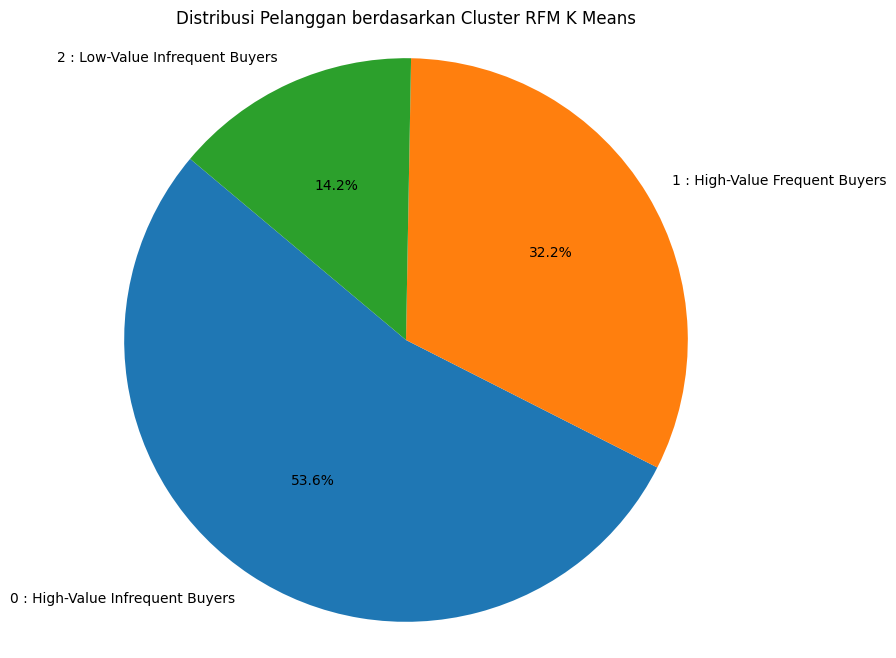

In [ ]:
# Hitung jumlah pelanggan dalam setiap cluster
cluster_counts = df_result['KMeans_rfm'].value_counts().sort_index()

# Define labels
labels = ['0 : High-Value Infrequent Buyers', '1 : High-Value Frequent Buyers', '2 : Low-Value Infrequent Buyers']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Pelanggan berdasarkan Cluster RFM K Means')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Tampilkan chart
plt.show()


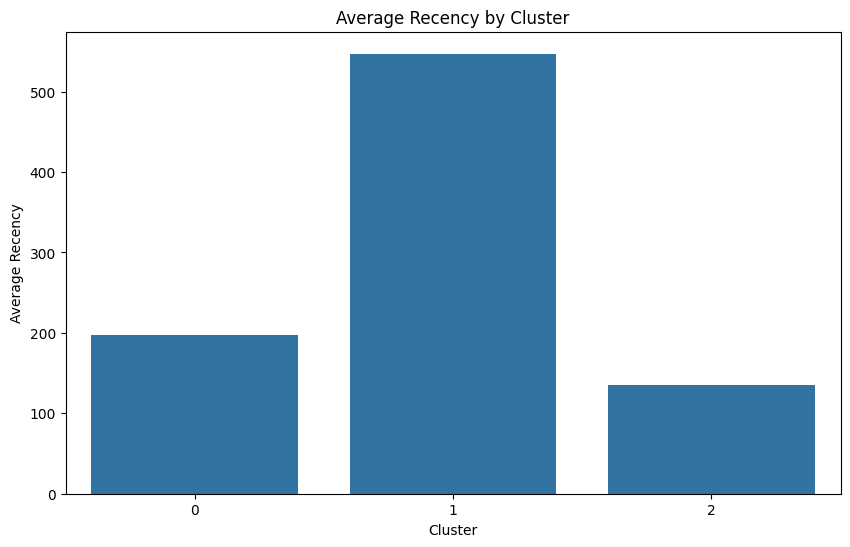

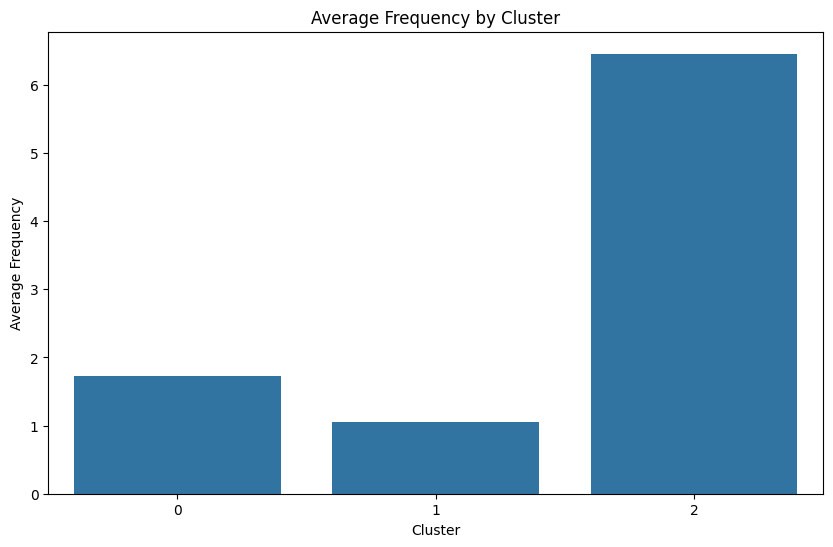

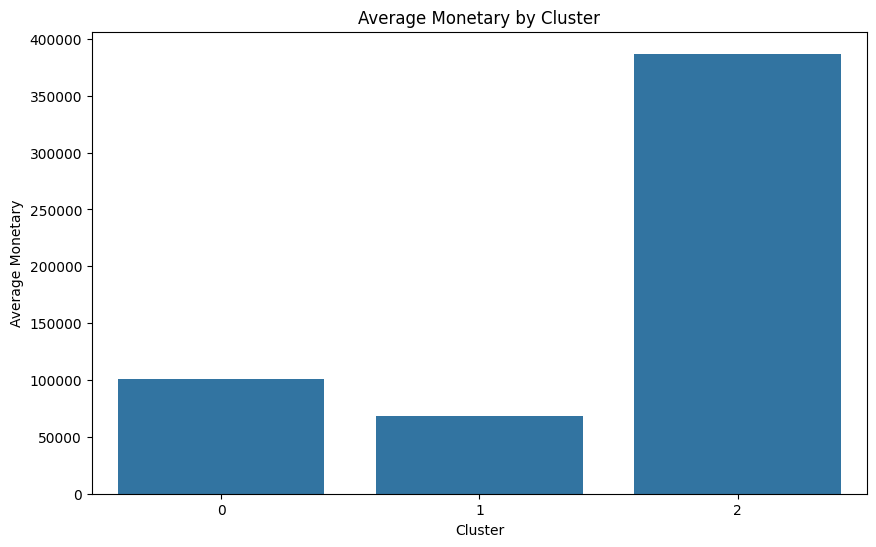

In [ ]:
# Menghitung rata-rata recency, frequency, dan monetary untuk setiap cluster
cluster_summary = df_result.groupby('KMeans_rfm').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean'
}).reset_index()

# Plot untuk Recency
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_summary, x='KMeans_rfm', y='recency')
plt.title('Average Recency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Recency')
plt.show()

# Plot untuk Frequency
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_summary, x='KMeans_rfm', y='frequency')
plt.title('Average Frequency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Frequency')
plt.show()

# Plot untuk Monetary
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_summary, x='KMeans_rfm', y='monetary')
plt.title('Average Monetary by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Monetary')
plt.show()

In [ ]:
# cluster_counts_rfm.to_csv('hasil21.csv', index=False)

# from google.colab import files

# files.download('hasil21.csv')

In [ ]:
# cluster_stats_kmeans.to_csv('hasil212.csv', index=False)

# from google.colab import files

# files.download('hasil212.csv')